In [3]:
import pandas as pd  # for data manipulation and analysis
import numpy as np # for numerical operations
import matplotlib.pyplot as plt  # for data visualization and plotting
import seaborn as sns   # for statistical data visualization with better interface than matplotlib

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score # for splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler # for scaling the data
from sklearn.linear_model import LogisticRegression #classification tasks
from sklearn.tree import DecisionTreeClassifier # decision tree model
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report # model evulation metrics 
from sklearn.impute import SimpleImputer

# This magic function ensures that any matplotlib plots are displayed directly within the notebook.
%matplotlib inline
sns.set_style("darkgrid") #Setting the seaborn style for better-looking plots with a dark grid background.

In [4]:
df = pd.read_csv("data/titanic.csv")

print(df.head())   # first 5 rows of the dataframe
print(df.info())    # summary information about the dataframe
print(df.describe())  # statistical summary of numeric column

   Passengerid   Age     Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
0            1  22.0   7.2500    0      1     0       0       0       0   
1            2  38.0  71.2833    1      1     0       0       0       0   
2            3  26.0   7.9250    1      0     0       0       0       0   
3            4  35.0  53.1000    1      1     0       0       0       0   
4            5  35.0   8.0500    0      0     0       0       0       0   

   zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  \
0       0  ...        0        0        0       3        0        0       2.0   
1       0  ...        0        0        0       1        0        0       0.0   
2       0  ...        0        0        0       3        0        0       2.0   
3       0  ...        0        0        0       1        0        0       2.0   
4       0  ...        0        0        0       3        0        0       2.0   

   zero.17  zero.18  2urvived  
0        0        0         0 

In [5]:
print(df.columns.tolist())

['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17', 'zero.18', '2urvived']


In [6]:
# checking for missing values in the dataset
print(df.isnull().sum()) # missing values in each columns
print(df.dtypes)  # data types

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64
Passengerid      int64
Age            float64
Fare           float64
Sex              int64
sibsp            int64
zero             int64
zero.1           int64
zero.2           int64
zero.3           int64
zero.4           int64
zero.5           int64
zero.6           int64
Parch            int64
zero.7           int64
zero.8           int64
zero.9           int64
zero.10          int64
zero.11          int64
zero.12          int64
zero.13          int64
zero.14          int64
Pclass           int64
zero.

In [7]:
# fill missing values with the mean or mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# drop columns that are not useful for prediction
df.drop(columns=['Passengerid', 'zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4',
                 'zero.5', 'zero.6', 'zero.7', 'zero.8', 'zero.9', 'zero.10',
                 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'zero.15', 'zero.16',
                 'zero.17', 'zero.18'], inplace=True) 

# Renaming incorrect or misnamed columns
df.rename(columns = {
    '2urvived' : 'Survived',
    'sibsp' : 'SibSp'
}, inplace = True)

# Convert the categorical 'Embarked' column into numerical values using one-hot encoding.  
# The 'drop_first=True' parameter removes the first category to prevent multicollinearity.
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [13]:
print(df.columns)

Index(['Age', 'Fare', 'Sex', 'SibSp', 'Parch', 'Pclass', 'Survived',
       'Embarked_1.0', 'Embarked_2.0'],
      dtype='object')


In [15]:
# splitting the data into training and testing sets(80% train, 20% test)
X = df.drop('Survived', axis = 1) # features (all columns except Survived)
y = df['Survived'] # target variable

X_train , X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 42)

In [17]:
# scalling the features(optional for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Fitting and transforming the training data
X_test = scaler.transform(X_test)  # Transforming the test data

In [19]:
# Training the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Training the Decision Tree model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
# Making predictions using both models
y_pred_log_reg = log_reg.predict(X_test)
y_pred_tree = tree.predict(X_test)

# Evaluating the performance of the models
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Printing the accuracy of both models
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(f"Decision Tree Accuracy: {accuracy_tree}")


Logistic Regression Accuracy: 0.767175572519084
Decision Tree Accuracy: 0.7137404580152672


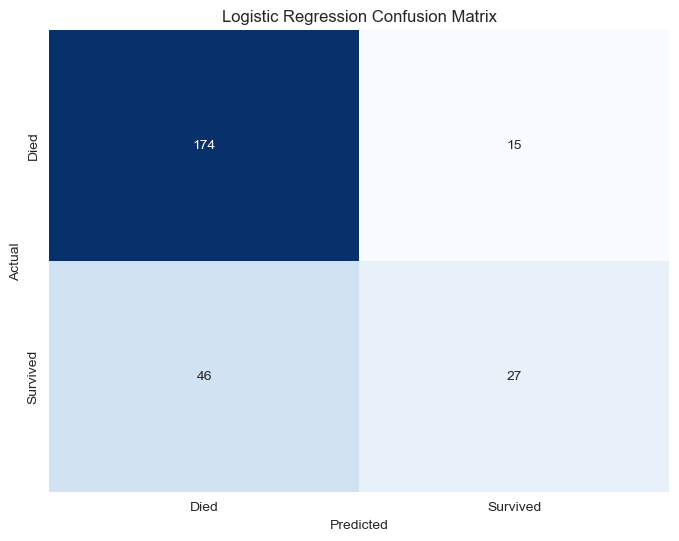

In [23]:
# Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#This function calculates the confusion matrix using the true values (y_test) and the predicted values (y_pred_log_reg) for the logistic regression model. 
#It counts the number of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) to evaluate the model’s performance.


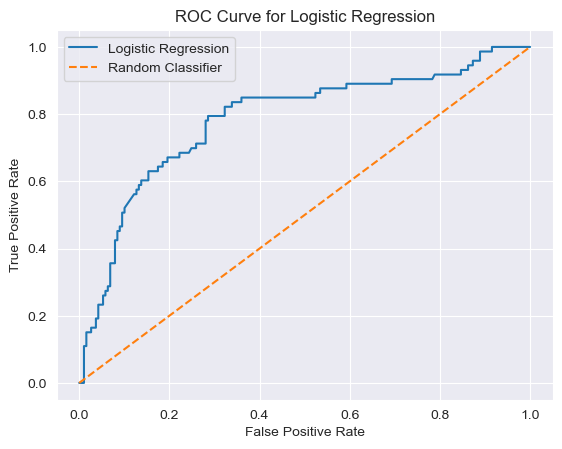

In [25]:
# ROC Curve for Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

#This function calculates the False Positive Rate (FPR) and True Positive Rate (TPR) for the Logistic Regression model based on the true labels (y_test) and the predicted probabilities.

In [27]:
# Model Tuning : We are trying to find the parameters that work best among certain hyperparameter values

param_grid = {
    'C' : [0.1,1,10],   # Regularization parameter 'C' values to test
    'solver' : ['liblinear','lbfgs'],  # Solver algorithms to try
    'max_iter' : [100,200]   # Maximum number of iterations for optimization
}
grid_search = GridSearchCV(LogisticRegression(),param_grid,cv = 5)
grid_search.fit(X_train,y_train)
print("Best parameters found : ", grid_search.best_params_)

# Tüm kombinasyonların skorlarını görmek için:
results = pd.DataFrame(grid_search.cv_results_)
print(results[['params', 'mean_test_score', 'std_test_score']])


Best parameters found :  {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
                                               params  mean_test_score  \
0   {'C': 0.1, 'max_iter': 100, 'solver': 'libline...         0.780337   
1      {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}         0.781276   
2   {'C': 0.1, 'max_iter': 200, 'solver': 'libline...         0.780337   
3      {'C': 0.1, 'max_iter': 200, 'solver': 'lbfgs'}         0.781276   
4    {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}         0.782251   
5        {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}         0.780337   
6    {'C': 1, 'max_iter': 200, 'solver': 'liblinear'}         0.782251   
7        {'C': 1, 'max_iter': 200, 'solver': 'lbfgs'}         0.780337   
8   {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}         0.781294   
9       {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}         0.780337   
10  {'C': 10, 'max_iter': 200, 'solver': 'liblinear'}         0.781294   
11      {'C': 10, 'max_iter': 200, 'so

Accuracy of the best model: 0.767175572519084
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       189
           1       0.64      0.37      0.47        73

    accuracy                           0.77       262
   macro avg       0.72      0.65      0.66       262
weighted avg       0.75      0.77      0.74       262



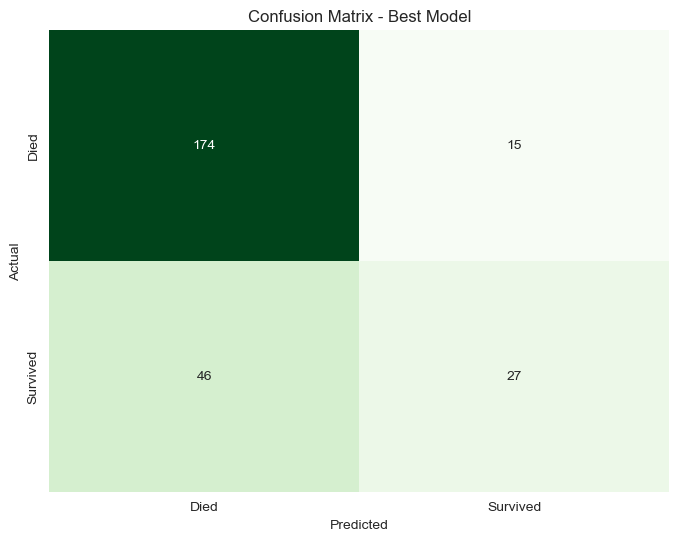

In [29]:
# Getting and testing the best model after GridSearch:

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred_best)
print("Accuracy of the best model:", accuracy)

#Show detailed classification metrics
print("Classification Report:\n", classification_report(y_test, y_pred_best))

#Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Confusion Matrix - Best Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
#cross-validation : splits data into folds to evaluate the model's generalization ability and reduce overfitting.

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=10)

# Printing all the individual cross-validation scores from each fold
print("Cross-validation scores: ", scores)

# Calculating and printing the mean score across all the folds to summarize the model's performance
print("Mean cross-validation score: ", scores.mean())


Cross-validation scores:  [0.78095238 0.80952381 0.79047619 0.74285714 0.75238095 0.8
 0.79047619 0.75       0.80769231 0.78846154]
Mean cross-validation score:  0.7812820512820513


In [33]:
import pickle

# Save the model (best_model is the optimized model after GridSearch)
with open("titanic_best_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

# Additionally, save the scaler (needed on the Streamlit side to scale user input)
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)



In [35]:
print(X.columns.tolist())


['Age', 'Fare', 'Sex', 'SibSp', 'Parch', 'Pclass', 'Embarked_1.0', 'Embarked_2.0']
